<a href="https://colab.research.google.com/github/AyushAgarwalGithub/cat-vs-dog/blob/main/catvsdog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d tongpython/cat-and-dog
!kaggle datasets download -d bhavikjikadara/dog-and-cat-classification-dataset

 94% 204M/218M [00:02<00:00, 80.3MB/s]
100% 218M/218M [00:02<00:00, 81.7MB/s]
 98% 756M/775M [00:05<00:00, 167MB/s]
100% 775M/775M [00:05<00:00, 153MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cat-and-dog.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
zip_re = zipfile.ZipFile('/content/dog-and-cat-classification-dataset.zip', 'r')
zip_re.extractall('/content')
zip_re.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_set = train_datagen.flow_from_directory(
        '/content/PetImages',
        target_size=(64,64),
        batch_size=32,
        class_mode='binary')

Found 24998 images belonging to 2 classes.


In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)


test_set = test_datagen.flow_from_directory(
    '/content/test_set/test_set',
    target_size = (64,64),
    batch_size = 32,
    class_mode = 'binary')

Found 2023 images belonging to 2 classes.


In [8]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
fit = model.fit(train_set,epochs=25,validation_data=test_set)

Epoch 1/25
580/782 [=====================>........] - ETA: 19s - loss: 0.5989 - accuracy: 0.6809

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


782/782 [==============================] - 86s 99ms/step - loss: 0.5769 - accuracy: 0.6985 - val_loss: 0.5438 - val_accuracy: 0.7088
Epoch 2/25
782/782 [==============================] - 80s 102ms/step - loss: 0.4520 - accuracy: 0.7869 - val_loss: 0.8616 - val_accuracy: 0.5947
Epoch 3/25
782/782 [==============================] - 75s 96ms/step - loss: 0.3921 - accuracy: 0.8219 - val_loss: 0.3433 - val_accuracy: 0.8438
Epoch 4/25
782/782 [==============================] - 75s 96ms/step - loss: 0.3489 - accuracy: 0.8461 - val_loss: 0.3459 - val_accuracy: 0.8413
Epoch 5/25
782/782 [==============================] - 76s 98ms/step - loss: 0.3162 - accuracy: 0.8634 - val_loss: 0.3561 - val_accuracy: 0.8319
Epoch 6/25
782/782 [==============================] - 75s 97ms/step - loss: 0.2911 - accuracy: 0.8766 - val_loss: 0.3136 - val_accuracy: 0.8641
Epoch 7/25
782/782 [==============================] - 75s 96ms/step - loss: 0.2700 - accuracy: 0.8826 - val_loss: 0.2825 - val_accuracy: 0.8754
Ep

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.utils import load_img,img_to_array
def finder(address_of_img:str)->bool:
  test_img=load_img(address_of_img,target_size=(64,64))
  test_img=img_to_array(test_img)
  test_img=np.expand_dims(test_img,axis=0)
  result=model.predict(test_img)
  train_set.class_indices
  return('Dog' if result else 'Cat')

1/1 [==============================] - 0s 70ms/step


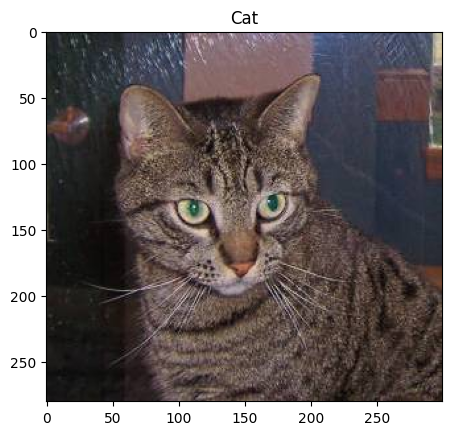

In [15]:

image_path='/content/cat test3.jpg'
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.imshow(img_rgb)
plt.title(finder(image_path))
plt.show()

1/1 [==============================] - 0s 21ms/step


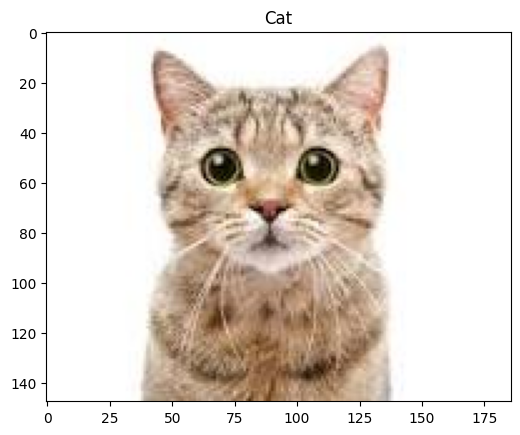

In [16]:

image_path='/content/cat test.jpg'
img = cv2.imread(image_path)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.imshow(img_rgb)
plt.title(finder(image_path))
plt.show()

1/1 [==============================] - 0s 21ms/step


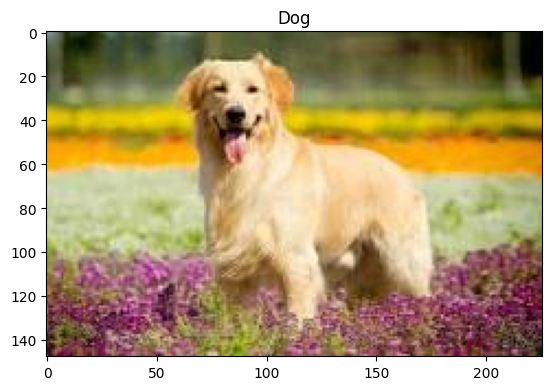

In [17]:

image_path='/content/dog test.jpg'
img = cv2.imread(image_path)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.imshow(img_rgb)
plt.title(finder(image_path))
plt.show()

1/1 [==============================] - 0s 21ms/step


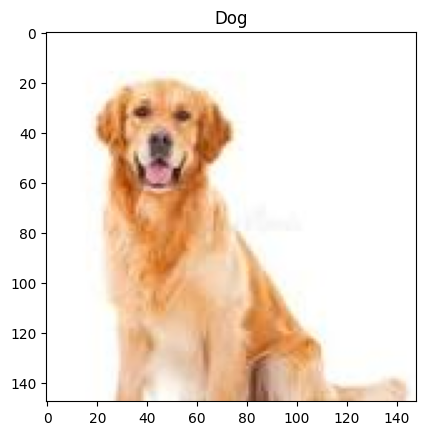

In [18]:

image_path='/content/dog test2.jpg'
img = cv2.imread(image_path)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.imshow(img_rgb)
plt.title(finder(image_path))
plt.show()

In [19]:
import pickle

In [20]:
pickle.dump(fit,open("model.pkl","wb"))